In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np

#Loading the dataset
data = '/content/Uncleaned_employees_final_dataset (1).csv'
df = pd.read_csv(data)

#Displaying basic info from the dataset
print("Dataset info:")
df.info()

print("\nDataset head:")
df.head()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB

Dataset head:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [3]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 2


In [4]:
# Drop duplicate rows
df = df.drop_duplicates()


In [5]:
# Confirm duplicates have been removed
duplicate_count_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_count_after}")

Number of duplicate rows after removal: 0


In [6]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64


In [7]:
# Filling in education with mode impudation
df['education'].fillna(df['education'].mode()[0], inplace=True)

<ipython-input-7-003def663e02>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(df['education'].mode()[0], inplace=True)
<ipython-input-7-003def663e02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'].fillna(df['education'].mode()[0], inplace=True)


In [8]:
# Filling in previous year rating with the median
df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)

<ipython-input-8-89b8452d02da>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)
<ipython-input-8-89b8452d02da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)


In [9]:
# Verifying that there are no missing values
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
employee_id              0
department               0
region                   0
education                0
gender                   0
recruitment_channel      0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
KPIs_met_more_than_80    0
awards_won               0
avg_training_score       0
dtype: int64


In [10]:
# Filter top performers based on the criteria
top_performers = df[(df['KPIs_met_more_than_80'] == 1) & (df['awards_won'] == 1) & (df['previous_year_rating'] >= 4)]

# Display the number of top performers and their characteristics
print(f"Number of top performers: {top_performers.shape[0]}")
top_performers.head()


Number of top performers: 131


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
262,70734,Procurement,region_15,Bachelors,m,other,1,38,4.0,2,1,1,97
640,62916,Sales & Marketing,region_7,Bachelors,m,other,1,42,5.0,7,1,1,91
703,70360,Procurement,region_20,Bachelors,f,other,1,31,5.0,2,1,1,71
723,71343,Procurement,region_27,Masters & above,m,other,2,40,4.0,10,1,1,67
745,26676,Sales & Marketing,region_17,Bachelors,m,sourcing,1,32,5.0,6,1,1,46


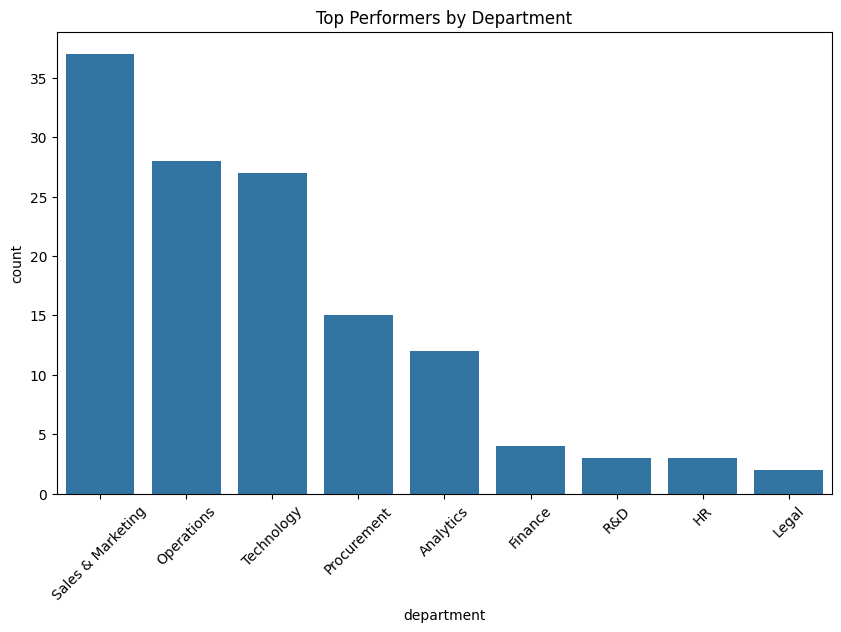

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter top performers based on the criteria
top_performers = df[(df['KPIs_met_more_than_80'] == 1) & (df['awards_won'] == 1) & (df['previous_year_rating'] >= 4)]

# Plot top performers by department
plt.figure(figsize=(10, 6))
sns.countplot(data=top_performers, x='department', order=top_performers['department'].value_counts().index)
plt.title('Top Performers by Department')
plt.xticks(rotation=45)
plt.show()


<ipython-input-12-64b138204bb4>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=kpi_proportion, x='education', y='KPIs_met_more_than_80', ci=None, order=kpi_proportion['education'])


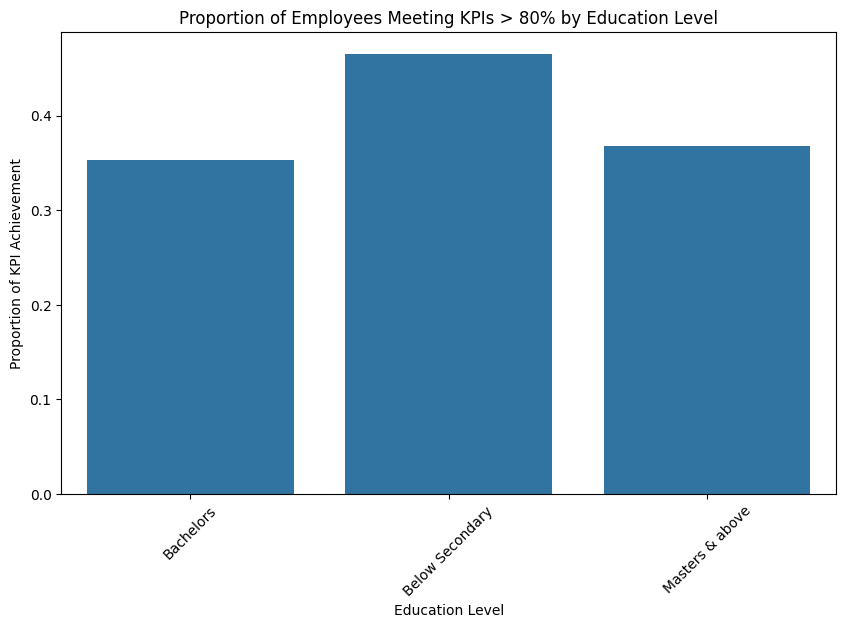

In [12]:
# Plot KPI achievement (>80%) by education level
kpi_proportion = df.groupby('education')['KPIs_met_more_than_80'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=kpi_proportion, x='education', y='KPIs_met_more_than_80', ci=None, order=kpi_proportion['education'])
plt.title("Proportion of Employees Meeting KPIs > 80% by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Proportion of KPI Achievement")
plt.xticks(rotation=45)
plt.show()

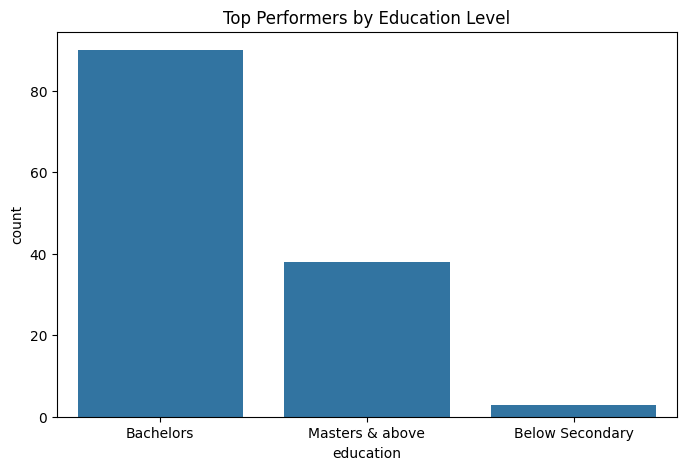

In [13]:
# Plot top performers by education level
plt.figure(figsize=(8, 5))
sns.countplot(data=top_performers, x='education', order=top_performers['education'].value_counts().index)
plt.title('Top Performers by Education Level')
plt.show()

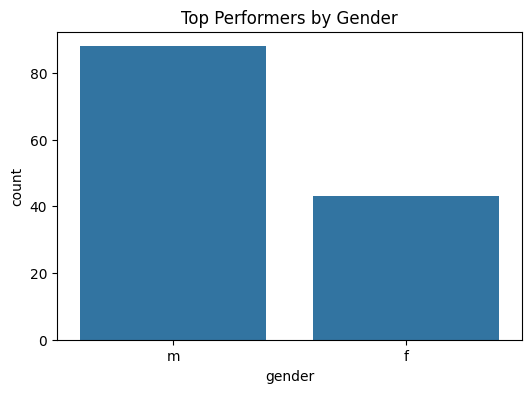

In [14]:
# Plot top performers by gender
plt.figure(figsize=(6, 4))
sns.countplot(data=top_performers, x='gender')
plt.title('Top Performers by Gender')
plt.show()

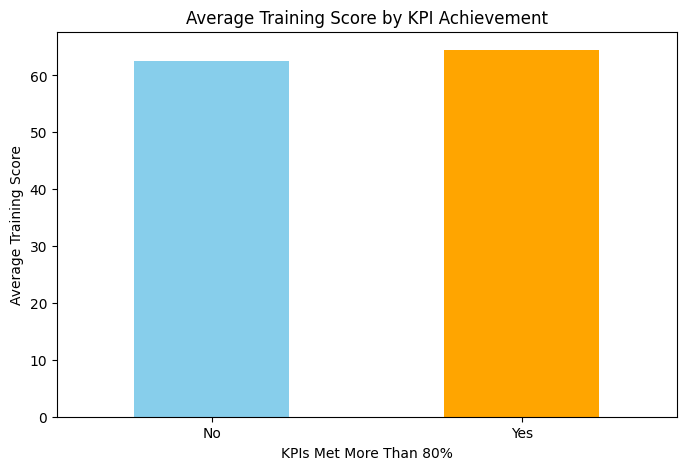

In [15]:
# Bar chart: Average training score by KPI achievement
plt.figure(figsize=(8, 5))
df.groupby('KPIs_met_more_than_80')['avg_training_score'].mean().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average Training Score by KPI Achievement')
plt.xlabel('KPIs Met More Than 80%')
plt.ylabel('Average Training Score')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()


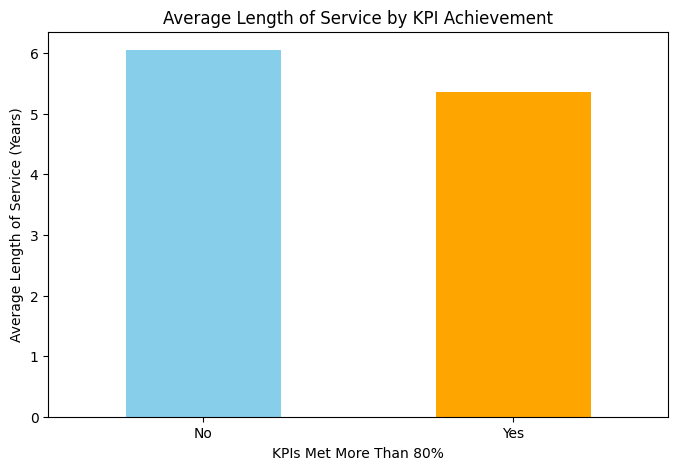

In [16]:
# Bar chart: Average length of service by KPI achievement
plt.figure(figsize=(8, 5))
df.groupby('KPIs_met_more_than_80')['length_of_service'].mean().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average Length of Service by KPI Achievement')
plt.xlabel('KPIs Met More Than 80%')
plt.ylabel('Average Length of Service (Years)')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

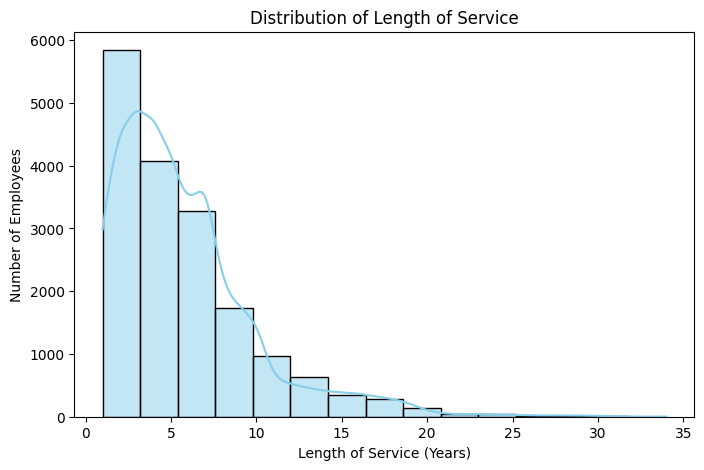

In [17]:
# Histogram to visualize distribution of length of service
plt.figure(figsize=(8, 5))
sns.histplot(df['length_of_service'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Length of Service')
plt.xlabel('Length of Service (Years)')
plt.ylabel('Number of Employees')
plt.show()


In [18]:
# Create a new column 'turnover_risk' based on length of service
df['turnover_risk'] = df['length_of_service'].apply(lambda x: 1 if x > 5 else 0)

# Check the distribution of the target variable
df['turnover_risk'].value_counts()


,count
turnover_risk,
0,9917
1,7498


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Features and target
X = df[['department', 'age', 'KPIs_met_more_than_80', 'awards_won', 'avg_training_score', 'no_of_trainings']]
y = df['turnover_risk']

# One-hot encode the 'department' column
column_transformer = ColumnTransformer(
    [('dept_encoder', OneHotEncoder(), ['department'])],
    remainder='passthrough'
)


In [20]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a pipeline with a Random Forest Classifier
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [21]:
# Train the model
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dept_encoder',
                                                  OneHotEncoder(),
                                                  ['department'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [22]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [23]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6847846889952153

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      2991
           1       0.62      0.66      0.64      2234

    accuracy                           0.68      5225
   macro avg       0.68      0.68      0.68      5225
weighted avg       0.69      0.68      0.69      5225



<ipython-input-24-4f6c38010672>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


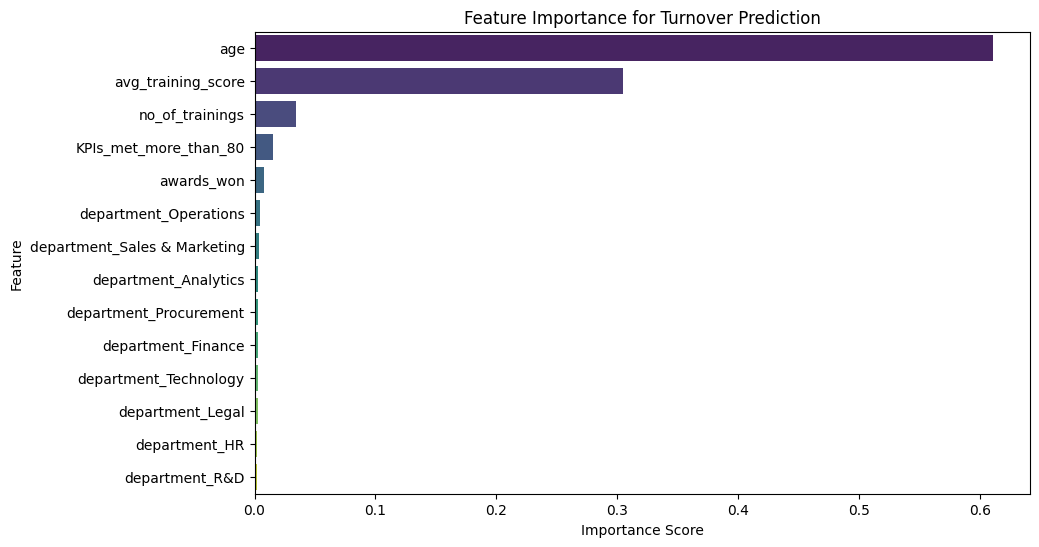

In [24]:
# Extract feature importances from the random forest classifier
feature_importances = pipeline.named_steps['classifier'].feature_importances_

# Get feature names after one-hot encoding
feature_names = column_transformer.named_transformers_['dept_encoder'].get_feature_names_out(['department']).tolist()
feature_names += ['age', 'KPIs_met_more_than_80', 'awards_won', 'avg_training_score', 'no_of_trainings']

# Create a dataframe for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance for Turnover Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
